In [2110]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

In [2111]:
GHSV = 120000 # mL/g/h
wcat = 0.62 # g
L = 2 # cm
ID = 0.6 # cm
A = np.pi*ID**2 /4 # cm2
Vcat = A * L # mL
rho_cat= wcat/Vcat # g/mL
rho_cat


1.0964007190775011

In [2112]:
Fvi = GHSV * wcat / 3600 # mL/s
Fi = Fvi/1000*1/0.082057/273.15 # mol/s
zCO2 = 0.25
zH2 = 0.75
FCO2i = Fi * zCO2
FH2i = Fi * zH2
FCO2i, FH2i

(0.00023051203430719827, 0.0006915361029215948)

In [2113]:
df_exp = pd.read_csv('RWGS_kinetic_data_NiCe.csv')
df_exp['Fi_CO2'] = FCO2i; df_exp['Fi_H2'] = FH2i
df_exp['S_CO'] = df_exp['CO']/(df_exp['CO']+df_exp['CH4'])*100; df_exp['S_CH4'] = df_exp['CH4']/(df_exp['CO']+df_exp['CH4'])*100
df_exp['Ai_C'] = df_exp['Fi_CO2']; df_exp['Ai_H'] = df_exp['Fi_H2']*2; df_exp['Ai_O'] = df_exp['Fi_CO2']*2
df_exp['F_CO2'] = df_exp['Fi_CO2']*(1-df_exp['X']/100)
df_exp['F_CO'] = df_exp['Fi_CO2']*df_exp['X']/100*df_exp['S_CO']/100
df_exp['F_CH4'] = df_exp['Fi_CO2']*df_exp['X']/100*df_exp['S_CH4']/100
df_exp['F_H2O'] = df_exp['F_CO'] + df_exp['F_CH4']*2
df_exp['F_H2'] = df_exp['Fi_H2'] - df_exp['F_CO'] - df_exp['F_CH4']*4
df_exp['A_C'] = df_exp['F_CO2'] + df_exp['F_CO'] + df_exp['F_CH4']
df_exp['A_H'] = df_exp['F_H2O']*2 + df_exp['F_H2']*2 + df_exp['F_CH4']*4
df_exp['Fi_sum'] = df_exp['Fi_CO2'] + df_exp['Fi_H2']
df_exp['F_sum'] = df_exp['F_CO2'] + df_exp['F_CO'] + df_exp['F_CH4'] + df_exp['F_H2O'] + df_exp['F_H2']
df_exp

,cat no,cat,Temp,X,CO,CH4,Fi_CO2,Fi_H2,S_CO,S_CH4,...,Ai_O,F_CO2,F_CO,F_CH4,F_H2O,F_H2,A_C,A_H,Fi_sum,F_sum
0,1,12Ni|HSA-Al2O3 (SIM),880.5667,81.8,96.8,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000042,0.000189,0.000000,0.000189,0.000503,0.000231,0.001383,0.000922,0.000922
1,1,12Ni|HSA-Al2O3 (SIM),787.4667,78.8,96.9,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000049,0.000182,0.000000,0.000182,0.000510,0.000231,0.001383,0.000922,0.000922
2,1,12Ni|HSA-Al2O3 (SIM),689.4333,74.5,96.6,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000059,0.000172,0.000000,0.000172,0.000520,0.000231,0.001383,0.000922,0.000922
3,1,12Ni|HSA-Al2O3 (SIM),590.9000,67.9,92.6,4.5,0.000231,0.000692,95.365602,4.634398,...,0.000461,0.000074,0.000149,0.000007,0.000164,0.000513,0.000231,0.001383,0.000922,0.000908
4,1,12Ni|HSA-Al2O3 (SIM),485.0333,57.6,73.9,24.5,0.000231,0.000692,75.101626,24.898374,...,0.000461,0.000098,0.000100,0.000033,0.000166,0.000460,0.000231,0.001383,0.000922,0.000856
5,1,12Ni|HSA-Al2O3 (SIM),368.4667,39.2,84.8,13.7,0.000231,0.000692,86.091371,13.908629,...,0.000461,0.000140,0.000078,0.000013,0.000103,0.000563,0.000231,0.001383,0.000922,0.000897
6,2,12Ni2Ce|HSA-Al2O3 (SIM),878.1000,81.7,96.9,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000042,0.000188,0.000000,0.000188,0.000503,0.000231,0.001383,0.000922,0.000922
7,2,12Ni2Ce|HSA-Al2O3 (SIM),783.2667,78.6,96.9,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000049,0.000181,0.000000,0.000181,0.000510,0.000231,0.001383,0.000922,0.000922
8,2,12Ni2Ce|HSA-Al2O3 (SIM),681.2000,74.2,96.5,0.0,0.000231,0.000692,100.000000,0.000000,...,0.000461,0.000059,0.000171,0.000000,0.000171,0.000520,0.000231,0.001383,0.000922,0.000922
9,2,12Ni2Ce|HSA-Al2O3 (SIM),583.9000,67.6,91.9,5.1,0.000231,0.000692,94.742268,5.257732,...,0.000461,0.000075,0.000148,0.000008,0.000164,0.000511,0.000231,0.001383,0.000922,0.000906


In [2114]:
df_1 = pd.DataFrame()
df_1['T'] = df_exp[df_exp['cat no'] == 1]['Temp']
df_1['Fi_CO2'] = df_exp[df_exp['cat no'] == 1]['Fi_CO2']
df_1['Fi_H2'] = df_exp[df_exp['cat no'] == 1]['Fi_H2']
df_1['F_CO2'] = df_exp[df_exp['cat no'] == 1]['F_CO2']
df_1['F_CO'] = df_exp[df_exp['cat no'] == 1]['F_CO']
df_1['F_CH4'] = df_exp[df_exp['cat no'] == 1]['F_CH4']
df_1['F_H2O'] = df_exp[df_exp['cat no'] == 1]['F_H2O']
df_1['F_H2'] = df_exp[df_exp['cat no'] == 1]['F_H2']
df_1['Fi_sum'] = df_exp[df_exp['cat no'] == 1]['Fi_sum']
df_1['F_sum'] = df_exp[df_exp['cat no'] == 1]['F_sum']
df_1['VFi'] = df_1['Fi_sum']*0.082057*(df_1['T']+273.15)
df_1['VF'] = df_1['F_sum']*0.082057*(df_1['T']+273.15)
df_1['resi'] = df_1['VFi']/Vcat
df_1['res'] = df_1['VF']/Vcat
df_1['rt'] = (df_1['resi'] + df_1['res'])/2
df_1

/home/sjbaek/miniforge3/envs/torchenv/lib/python3.11/site-packages/IPython/core/displayhook.py:292: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,T,Fi_CO2,Fi_H2,F_CO2,F_CO,F_CH4,F_H2O,F_H2,Fi_sum,F_sum,VFi,VF,resi,res,rt
0,880.5667,0.000231,0.000692,0.000042,0.000189,0.000000,0.000189,0.000503,0.000922,0.000922,0.087291,0.087291,0.154364,0.154364,0.154364
1,787.4667,0.000231,0.000692,0.000049,0.000182,0.000000,0.000182,0.000510,0.000922,0.000922,0.080247,0.080247,0.141907,0.141907,0.141907
2,689.4333,0.000231,0.000692,0.000059,0.000172,0.000000,0.000172,0.000520,0.000922,0.000922,0.072830,0.072830,0.128791,0.128791,0.128791
3,590.9000,0.000231,0.000692,0.000074,0.000149,0.000007,0.000164,0.000513,0.000922,0.000908,0.065374,0.064346,0.115607,0.113788,0.114698
4,485.0333,0.000231,0.000692,0.000098,0.000100,0.000033,0.000166,0.000460,0.000922,0.000856,0.057365,0.053251,0.101443,0.094169,0.097806
5,368.4667,0.000231,0.000692,0.000140,0.000078,0.000013,0.000103,0.000563,0.000922,0.000897,0.048545,0.047222,0.085846,0.083506,0.084676


In [2115]:
def ode(t, N, T, k):
    pP = N/sum(N)*1.01325
    # 0 CO2, 1 H2, 2 CO, 3 CH4, 4 H2O

    TK = T +273.15

    kMTN = k[0]*np.exp(-k[2]/(0.008314*TK))
    kRWGS = k[1]*np.exp(-k[3]/(0.008314*TK))

    KCO = k[4]*np.exp(-k[8]/(0.008314*TK))
    KH2O = k[5]*np.exp(-k[9]/(0.008314*TK))
    KCO2 = k[6]*np.exp(-k[10]/(0.008314*TK))
    KH2 = k[7]*np.exp(-k[11]/(0.008314*TK))

    # KDRM = k[14]*np.exp(-k[15]/(TK))

    den = 1 + KCO2*pP[0] + KH2*pP[1] + KH2O*pP[4] + KCO*pP[2]

    Keq_MTN = np.exp(29.72969 + 0.002703*TK + 17791.69/TK - 7.7973*np.log(TK))
    Keq_RWGS = np.exp(13.64981 + 2.80537e-5*TK - 5214.4/TK - 1.2507* np.log(TK))
    Keq_DRM = np.exp(-2.43006 - 0.00265*TK -28616.5/TK + 5.295903*np.log(TK))

    rMTN = kMTN*KH2*KCO2*pP[1]*(1 - pP[3]*pP[4]**2/pP[1]**4/pP[0]/Keq_MTN)/den**2
    rRWGS = kRWGS*KCO2*pP[0]*(1 - pP[2]*pP[4]/pP[1]/pP[0]/Keq_RWGS)/den

    dN0dt = -rMTN*0.02 - rRWGS*0.02
    dN1dt = -4*rMTN*0.02 - rRWGS*0.02
    dN2dt = 0.02*rRWGS
    dN3dt = rMTN*0.02
    dN4dt = 2*rMTN*0.02 + rRWGS*0.02

    return np.array([dN0dt, dN1dt, dN2dt, dN3dt, dN4dt])


In [2116]:
def solve_ode(k, df):
    tend = df['rt']
    N0 = [df['Fi_CO2'],df['Fi_H2'],1e-10,1e-10,1e-10]
    T = df['T']
    sol = solve_ivp(
        ode,
        t_span = (0,tend),
        y0 = N0,
        args = (T, k,),
        method = 'BDF'  )
    return sol.y

In [2117]:
def obj(x):
    k0 = np.array([1.857e6, 2.967e4, 110, 97.1, 2.39e-3, 6.09e-1, 1.07, 5.2e-5, 40.6, 14.5, 9.72, 52])
    k = 10**x*k0
    err = 0
    for i in range(len(df_1)):
        N_pred = solve_ode(k, df_1.iloc[i])[:,-1]
        N_exp = df_1.iloc[i][['F_CO2','F_H2','F_CO','F_CH4','F_H2O']].values
        err += np.sum((N_pred - N_exp)**2)*1e6
    return err

In [ ]:
k0 = np.array([1.857e6, 2.967e4, 110, 97.1, 2.39e-3, 6.09e-1, 1.07, 5.2e-5, 40.6, 14.5, 9.72, 52])
# 0 kMTN, 1 kRWGS, 2 EaMTN, 3 EaRWGS, 4 K0CO, 5 K0H2O, 6 K0CO2, 7 K0H2, 8 QCO, 9 QH2O, 10 QCO2, 11 QH2
best_loss = float('inf')
best_x = np.zeros(12)
bounds = [(-4,4), (-2,4), (-0.4,0.4), (-0.4,0.4), (-2,4), (-3,4), (-4,4), (-1,4), (-4,4), (-4,4), (-4,4), (-4,4)]
x0 = best_x
# result = minimize(
#     obj,
#     x0=x0,
#     method='Nelder-Mead',
#     options={'maxiter': 10000}
# )
for i in range(100):  # 10번 반복
    result = minimize(
        obj,
        x0=x0,
        method='L-BFGS-B',
        bounds=bounds
    )
    
    # 현재 시도의 loss 출력
    print(f'시도 {i+1} - Loss: {result.fun:.6f}, Best Loss: {best_loss:.6f}')
    
    if result.fun < best_loss:
        best_loss = result.fun
        best_x = result.x.copy()
        x0 = result.x.copy()  # 더 나은 결과를 얻은 경우 x0를 result.x로 갱신
    else:
        x0 = best_x.copy()  # 더 나은 결과를 얻지 못한 경우 best_x를 x0로 사용
        
    # x0에 랜덤 변화 추가
    x0 = x0 * (1 + np.random.randn(len(x0)) * 0.1)




시도 1 - Loss: 0.021539, Best Loss: inf
시도 2 - Loss: 0.021539, Best Loss: 0.021539
시도 3 - Loss: 0.021540, Best Loss: 0.021539
시도 4 - Loss: 0.021539, Best Loss: 0.021539
시도 5 - Loss: 0.021544, Best Loss: 0.021539
시도 6 - Loss: 0.021539, Best Loss: 0.021539
시도 7 - Loss: 0.021539, Best Loss: 0.021539
시도 8 - Loss: 0.021539, Best Loss: 0.021539
시도 9 - Loss: 0.021539, Best Loss: 0.021539
시도 10 - Loss: 0.021539, Best Loss: 0.021539
시도 11 - Loss: 0.021539, Best Loss: 0.021539
시도 12 - Loss: 0.021539, Best Loss: 0.021539
시도 13 - Loss: 0.017906, Best Loss: 0.021539
시도 14 - Loss: 0.017642, Best Loss: 0.017906
시도 15 - Loss: 0.017571, Best Loss: 0.017642
시도 16 - Loss: 0.017453, Best Loss: 0.017571
시도 17 - Loss: 0.017375, Best Loss: 0.017453
시도 18 - Loss: 0.017259, Best Loss: 0.017375
시도 19 - Loss: 0.017074, Best Loss: 0.017259
시도 20 - Loss: 0.017245, Best Loss: 0.017074
시도 21 - Loss: 0.017251, Best Loss: 0.017074
시도 22 - Loss: 0.017098, Best Loss: 0.017074
시도 23 - Loss: 0.017219, Best Loss: 0.017074
시도

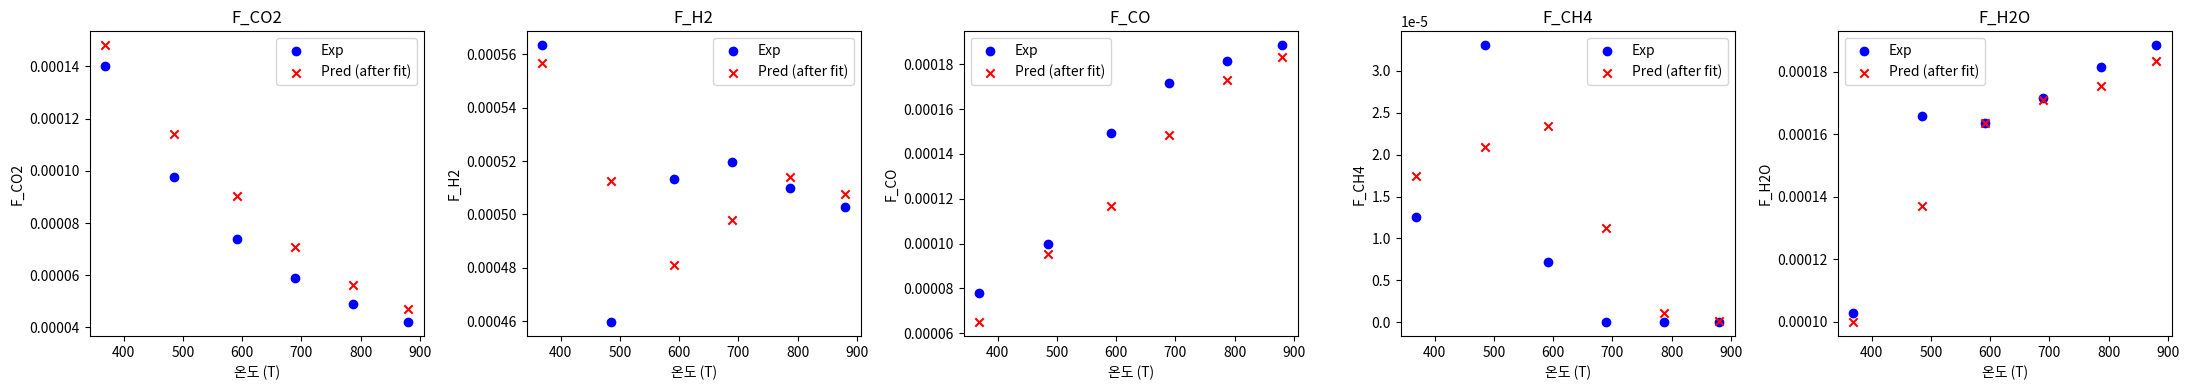

In [2119]:
# df_1에 대해서 온도(x축)에 따른 실험값, fitting 후 예측값만 비교하는 그래프를 그려줌
import matplotlib.pyplot as plt

species = ['F_CO2', 'F_H2', 'F_CO', 'F_CH4', 'F_H2O']

comparison_rows = []
for idx, case in df_1.iterrows():
    N_pred_after = solve_ode(10**best_x*k0, case)[:,-1]  # fitting 후
    N_exp = case[species].values
    row = {
        'case_idx': idx,
        'T': case['T']
    }
    for i, s in enumerate(species):
        row[f'{s}_pred_after'] = N_pred_after[i]
        row[f'{s}_exp'] = N_exp[i]
        row[f'{s}_diff_after'] = N_pred_after[i] - N_exp[i]
    comparison_rows.append(row)
    
comparison_df = pd.DataFrame(comparison_rows)

# 각 종별로 온도를 x축으로, 실험값, 예측값(피팅 후)만 비교하는 그래프 그리기
fig, axs = plt.subplots(1, len(species), figsize=(22, 4))
for i, s in enumerate(species):
    ax = axs[i]
    # 실험값
    ax.scatter(comparison_df['T'], comparison_df[f'{s}_exp'], label='Exp', marker='o', color='b')
    # 예측값 (fitting 후)
    ax.scatter(comparison_df['T'], comparison_df[f'{s}_pred_after'], label='Pred (after fit)', marker='x', color='r')
    ax.set_xlabel('온도 (T)')
    ax.set_ylabel(s)
    ax.set_title(s)
    ax.legend()
plt.tight_layout()
plt.show()

In [2120]:
10**best_x*k0

array([2.44265855e+004, 9.49682595e+005, 0.00000000e+000, 2.25031681e-004,
       2.83677766e-046, 3.48402915e-091, 1.58775741e+000, 6.58790379e-007,
       3.97822835e-001, 1.30463571e-106, 7.66543330e-140, 2.87233464e-002])

In [2125]:
10**0.4

2.51188643150958